In [1]:
import gps_particle_data
import wget
import os
import numpy as np 
import time
import json
import sys
import math
from datetime import datetime, timedelta, date
from itertools import compress
from random import randint
import urllib2
import aacgmv2
import scipy
import matplotlib
from matplotlib import gridspec
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
start_date = datetime(2013,1,6,0,0,0);
end_date = datetime(2013,1,9,0,0,0);
ms = gps_particle_data.meta_search();
ms.load_data(start_date,end_date);


Loading data for satellite  54
File : https://www.ngdc.noaa.gov/stp/space-weather/satellite-data/satellite-systems/gps/data/ns54/ns54_130106_v1.03.ascii


In [4]:
eq_s = gps_particle_data.earthquake_search(start_date,end_date, min_magnitude=4,min_lat=-90,max_lat=90,min_lon=-180,max_lon=180)
L_shells = eq_s.get_L_shells(400.0)
eq_datetimes = eq_s.get_datetimes()

In [5]:
output_data = ms.get_all_data_by_satellite()
signame = 'rate_electron_measured';
signal = np.asarray(output_data[54][signame])[:,2];
avg = np.mean(signal)
stddev = np.std(signal)
print avg, stddev

7.78529646825 9.08940847996


In [6]:
r = output_data[54][signame]
ch2 = np.asarray(r)[:,2]
sig_dif = np.subtract(ch2, avg)
ratio = np.divide(sig_dif, stddev)

In [7]:
indices = []
burst_indices = ratio>4

for i in range(len(burst_indices)):
    if burst_indices[i] == True:
        indices.append(i)

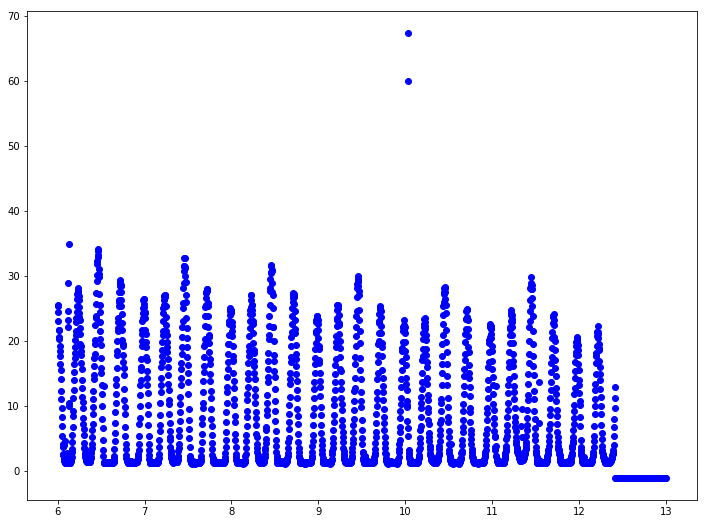

In [8]:
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111)
rate = np.asarray(r)[:,2]
dday = output_data[54]['decimal_day']
plt.scatter(dday, rate, color = 'b')
plt.show()

In [11]:
his_data = []
ls = output_data[54]['L_shell']
for i in indices:
    for j in range(len(L_shells)):
        date = datetime.strptime(str(eq_datetimes[j])[:10], "%Y-%m-%d")
        int_diy = date.timetuple().tm_yday
        rest = (float(str(eq_datetimes[j])[11:13])/24) + (float(str(eq_datetimes[j])[14:16])/(24*60))+(float(str(eq_datetimes[j])[17:19])/(24*3600))
        diy = int_diy + rest
        del_T = dday[i]-diy
        del_L = ls[i]-L_shells[j]
        if abs(del_L) < 0.07 and  abs(del_T) < 0.5:
            dT = del_T*24
            print dT
            with open('temp_cor.ascii', 'a') as f:
                np.savetxt(f, dT)

[ 25.00360311]
[ 25.07054756]
[ 25.089992]
[ 25.11443644]
[ 25.15165867]
[ 25.18471422]
[ 25.27388089]
[ 25.29971422]
[ 26.56721422]
[ 27.38138089]
[ 27.86221422]
[ 28.57860311]
[ 29.76332533]
[ 29.90193644]
[ 30.07943644]
[ 32.99415867]
[ 33.27721422]
[ 34.05415867]
[ 34.56110311]
[ 36.43804756]
[ 37.10526978]
[ 37.38304756]
[ 37.48638089]
[ 37.61138089]
[ 37.62915867]
[ 38.03443644]
[ 39.68554756]
[ 39.68860311]
[ 40.33526978]
[ 40.58388089]
[ 40.74582533]
[ 40.874992]
[ 40.97165867]
[ 41.759992]
[ 42.052492]
[ 42.57915867]
[ 42.744992]
[ 45.85332533]
[ 45.967492]
[ 48.90693644]
[ 49.31110311]
[ 49.40443644]
[ 52.254992]
[ 54.16276978]
[ 56.45693644]
[ 57.70360311]
[ 58.93304756]
[ 59.202492]
[ 59.89943644]
[ 61.15082533]
[ 61.53471422]
[ 63.39888089]
[ 63.81610311]
[ 64.60332533]
[ 66.01165867]
[ 67.284992]
[ 67.71415867]
[ 68.489992]
[ 69.27360311]
[ 70.84138089]
[ 71.25693644]
[ 71.90360311]
[ 72.13082533]
[ 77.17888089]
[ 77.97165867]
[ 78.41776978]
[ 78.53804756]
[ 78.65888089]
